# Exercise: Decision Tree on the Iris Dataset

Now it is your turn to train a Decision Tree by yourself !!

In this exercise, you are asked to build and train a Decision Tree model to classify the species of Iris plants. You can reuse the code in the previous workshop 5.1 to do this exercise.

![alt text](https://guopai.github.io/images/ml-blog04-iris-dataset.jpg)

We will use the Iris dataset for this exercise, which can be downloaded from here ([iris.csv](https://drive.google.com/file/d/17puHR8AgB0zyGJdKncfBL6RLJ19qwBt2/view?usp=sharing)). This dataset consists of five columns.

1. `sepal_length` (in cm)
1. `sepal_width` (in cm)
1. `petal_length` (in cm)
1. `petal_width` (in cm)
1. `species`

where the `species` column is the **label**, specifying the corresponding Iris species.

References
*   https://archive.ics.uci.edu/ml/datasets/iris


## Step 1: Prepare Environment

Import any required libraries here. You can add and rerun this cell later when you found that you miss some libraries.

In [1]:
# YOUR CODE HERE
# Load libraries
import numpy as np
import pandas as pd

## Step 2: Load Dataset

In this section, you will download the Iris dataset that we have prepared in the CSV format here ([iris.csv](https://drive.google.com/file/d/17puHR8AgB0zyGJdKncfBL6RLJ19qwBt2/view?usp=sharing)). Once you have download the `iris.csv` file, you then upload the csv file to the Google Colab notebook.

Next, you have to read the data from the `iris.csv` file and store the data in `df`.

In [2]:
# YOUR CODE HERE
df = pd.read_csv ('iris.csv')
print (df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


If you have successfully loaded the file, you should have a `df` variable, which consists of 150 rows and 5 columns.

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Step 3: Data Preparation

As you can see from the table above, the `species` column is still not numerical. Please transform such column into numerical ones using `LabelEncoder`, which can be imported as follows:

```python
from sklearn.preprocessing import LabelEncoder
```

The output should be assigned into a new columns of `df`, named `label`.

In [4]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['species_code'] = label_enc.fit_transform(df['species'])
print(label_enc.classes_)

df

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


If the conversion is success, your `df` should now contain 6 columns.

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Once you the `label` column, you can remove the `species` column from the `df`.

In [8]:
# YOUR CODE HERE
data_df = df.drop(columns=['species'])
data_df

,sepal_length,sepal_width,petal_length,petal_width,species_code
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Step 4: Split Data into Training and Test Sets

In this section we will prepare a training set and a test set.

*   The training set is used for training the model.
*   The test set is used to evaluate the trained model.

First, you need to extract the features and the label from the `df`.



In [15]:
X = data_df.drop(columns=['species_code']).values
y = data_df['species_code'].values
# print(X)
# print(y)

The expected output are `(150, 4) (150,)`.

In [13]:
print(X.shape, y.shape)

(150, 4) (150,)


Next we will split the dataset into two sets: **training set** and **test set**. Having a test set that contains different examples from the training set allows us to estimate the performance of our model on the **unseen data**.

To do this, we will use `train_test_split` provided in `sklearn.model_selection`.

The code below shows an example of how to use the `train_test_split`. You can try to change the proportion of the test set by changing the `test_size`.

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=0,
    test_size=0.2)  # try to change this number

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (120, 4), (120,)
Test set: (30, 4), (30,)


**Note:** it should be mentioned here that, typically, step 1 to 4 are **application-specific**. These steps can varies depending on the characteristics of your dataset.
Nevertheless, the purpose of these steps is to prepare the training (`X_train`,`y_train`) and the test (`X_test`,`y_test`) sets for training and evaluation a machine learning model.

## Step 5: Model Training

In this section, you will create and train a decision tree model using the training set.

First, you create a decision tree model, named `model`, using `DecisionTreeClassifier` from `sklearn.tree`



In [60]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

In [61]:
# YOUR CODE HERE
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Step 6: Prediction

Once you have trained the model, you are now ready to apply it to the test set (`X_test`). Make sure that the predictions are stored in `y_pred`.

**Note**: `y_test` should only be used for evaluation.

In [62]:
# YOUR CODE HERE
y_pred = model.predict(X_test)

## Step 7: Performance Evaluation

One of the most common metrics to determine the performance of our model is **accuracy**, which is the closeness of a measured value to a standard or known value.

In [63]:
# YOUR CODE HERE
np.mean(y_pred == y_test)

1.0

If you have done all of the steps correctly, the accuracy on the test set should be more than 0.95.

## Step 8: Visualize Decision Tree

In [64]:
feature_names = data_df.drop(columns=['species_code']).columns.values # YOUR CODE HERE
class_names = label_enc.classes_ # YOUR CODE HERE

If you have done it correctly, the following code should print 
* `sepal_length`, `sepal_width`, `petal_length` and `petal_width` for `feature_names`
* `setosa`, `versicolor` and `virginica` for `class_names`



In [65]:
print(f'feature_names: {feature_names}')
print(f'class_names: {class_names}')

feature_names: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
class_names: ['setosa' 'versicolor' 'virginica']


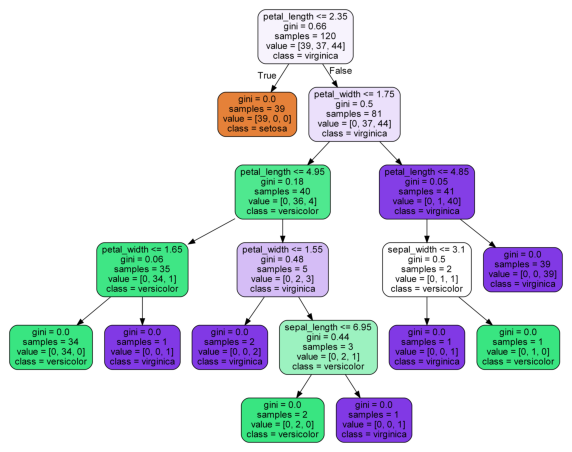

In [66]:
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt

# Export the decision tree
export_graphviz(
    model,                           # the trained decision tree here
    feature_names=feature_names,     # the list of feature names here
    class_names=class_names,         # the list of labels here
    out_file='tree.dot',
    rounded=True, proportion=False, precision=2, filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize=(10,12))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

You can also investigate the important features that the model used to make predictions.

In [67]:
for i in range(len(feature_names)):
    print(f'{feature_names[i]}: {model.feature_importances_[i]}')

sepal_length: 0.016711928138709
sepal_width: 0.012533946104031753
petal_length: 0.5439001233149002
petal_width: 0.42685400244235905


## Step 9: Adjust Model Capability

Currently, you may create a Decision Tree model using its default configuration. There are many parameters that you can specify to adjust the model capability. You can refer to [this website](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to adjust the capability of the decision tree.

In particular, you can try to specify:
*   `min_samples_split` to 30, 50, etc. 
*   `max_depth` to 2, 1, etc.

and then see how this affects the trained decision tree model.



Congratulations! You have successfully gone through the whole process for building a supervised ML model for classification. You will learn how to select the best model in the next lecture.